<a href="https://colab.research.google.com/github/pinkdolphin11/ESAA/blob/main/4_15_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<datetime 오브젝트로 변환하기 - to_datetime 메서드>

시계열 데이터가 문자열로 저장된 경우, 문자열은 시간 계산을 할 수 없으므로 datetime 오브젝트로 변환해야 함

[문자열을 datetime 오브젝트로 변환하기]

1. ebola 데이터 집합 불러오기

In [ ]:
import pandas as pd
import os

In [ ]:
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
ebola = pd.read_csv('../content/gdrive/MyDrive/country_timeseries.csv')

2. ebola 데이터프레임에는 문자열로 저장된 Date 열이 있음

In [ ]:
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

3. to_datetime 메서드로 Date 열의 자료형을 datetime 오브젝트로 변환 후 ebola 데이터프레임에 새로운 열로 추가

In [ ]:
ebola['date_dt']=pd.to_datetime(ebola['Date'])
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 0 entries
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 0 non-null      datetime64[ns]
 1   Day                  0 non-null      float64       
 2   Cases_Guinea         0 non-null      float64       
 3   Cases_Liberia        0 non-null      float64       
 4   Cases_SierraLeone    0 non-null      float64       
 5   Cases_Nigeria        0 non-null      float64       
 6   Cases_Senegal        0 non-null      float64       
 7   Cases_UnitedStates   0 non-null      float64       
 8   Cases_Spain          0 non-null      float64       
 9   Cases_Mali           0 non-null      float64       
 10  Deaths_Guinea        0 non-null      float64       
 11  Deaths_Liberia       0 non-null      float64       
 12  Deaths_SierraLeone   0 non-null      float64       
 13  Deaths_Nigeria       0 non-null      float64

4. 시간 형식 지정자(%d, %m, %y)와 기호 (/, -)를 적절히 조합하여 format 인자에 전달하면 그 형식에 맞게 정리된 datetime 오브젝트를 얻을 수 있음

In [ ]:
test_df1=pd.DataFrame({'order_day':['01/01/15','02/01/15','03/01/15']})

test_df1['date_dt1']=pd.to_datetime(test_df1['order_day'],format='%d/%m/%y')
test_df1['date_dt2']=pd.to_datetime(test_df1['order_day'],format='%m/%d/%y')
test_df1['date_dt3']=pd.to_datetime(test_df1['order_day'],format='%y/%m/%d')

print(test_df1)

  order_day   date_dt1   date_dt2   date_dt3
0  01/01/15 2015-01-01 2015-01-01 2001-01-15
1  02/01/15 2015-01-02 2015-02-01 2002-01-15
2  03/01/15 2015-01-03 2015-03-01 2003-01-15


In [ ]:
test_df2=pd.DataFrame({'order_day':['01-01-15','02-01-15','03-01-15']})
test_df2['date_dt']=pd.to_datetime(test_df2['order_day'],format='%d-%m-%y')

print(test_df2)

  order_day    date_dt
0  01-01-15 2015-01-01
1  02-01-15 2015-01-02
2  03-01-15 2015-01-03


<시간 형식 지정자>

** 시계열 데이터 구분해서 추출

now 메서드로 얻은 현재 시간의 시계열 데이터는 아주 정밀한 단위까지 시간을 표현한다. 하지만 원하는 시계열 데이터의 시간 요소가 연도, 월, 일뿐이라면 now 메서드로 얻은 시계열 데이터를 잘라내야 한다. 다음은 strftime 메서드와 시간 형식 지정자를 이용하여 시계열 데이터를 잘라낸 것이다.

In [ ]:
from datetime import datetime

now=datetime.now()
print(now)

2022-04-14 16:51:42.783000


In [ ]:
nowDate=now.strftime('%Y-%m-%d')
print(nowDate)

2022-04-14


In [ ]:
nowTime=now.strftime('%H:%M:%S')
print(nowTime)

16:51:42


In [ ]:
nowDatetime=now.strftime('%Y-%m-%d %H:%M:%S')
print(nowDatetime)

2022-04-14 16:51:42


<datetime 오브젝트로 변환하기 - read_csv 메서드>

앞에서 한 방법보다 datetime 오브젝트로 변환하려는 열을 지정하여 데이터 집합을 불러오는 것이 더 간단하다.

[datetime 오브젝트로 변환하려는 열을 지정하여 데이터 집합 불러오기]

1. read_csv 메서드의 parse_dates 인자에 datetime 오브젝트로 변환하고자 하는 열의 이름을 전달하여 데이터 집합을 불러오기

In [ ]:
ebola1=pd.read_csv('../content/gdrive/MyDrive/country_timeseries.csv',parse_dates=['Date'])
print(ebola1.info()) #Date 열이 문자열이 아니라 datetime 오브젝트로 출력

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

<datetime 오브젝트에서 날짜 정보 추출하기>

[datetime 오브젝트에서 날짜 정보 추출하기]

1. 문자열로 저장된 날짜를 시리즈에 담아 datetime 오브젝트로 변환

In [ ]:
date_series=pd.Series(['2018-05-16','2018-05-17','2018-05-18'])
d1=pd.to_datetime(date_series)
print(d1)

0   2018-05-16
1   2018-05-17
2   2018-05-18
dtype: datetime64[ns]


2. datetime 오브젝트(d1)의 year, month, day 속성을 이용하여 년, 월, 일 정보 추출

In [ ]:
print(d1[0].year)
print(d1[0].month)
print(d1[0].day)

2018
5
16


<dt 접근자 사용하기>

datetime 오브젝트에서 dt 접근자를 사용하면 datetime 속성이나 메서드를 사용하여 시계열 데이터 처리 가능

[dt 접근자로 시계열 데이터 정리하기]

1. ebola 데이터 집합을 불러오고, Date 열을 datetime 오브젝트로 변환하여 새로운 열(date_dt)로 추가

In [ ]:
ebola=pd.read_csv('../content/gdrive/MyDrive/country_timeseries.csv',parse_dates=['Date'])
ebola['date_dt']=pd.to_datetime(ebola['Date'])

2. dt 접근자를 사용하지 않고 인덱스가 3인 데이터의 년, 월, 일 데이터 추출

In [ ]:
print(ebola[['Date','date_dt']].head())

        Date    date_dt
0 2015-01-05 2015-01-05
1 2015-01-04 2015-01-04
2 2015-01-03 2015-01-03
3 2015-01-02 2015-01-02
4 2014-12-31 2014-12-31


In [ ]:
print(ebola['date_dt'][3].year)
print(ebola['date_dt'][3].month)
print(ebola['date_dt'][3].day)

2015
1
2


3. dt 접근자로 date_dt 열에 한 번에 접근한 뒤 year 속성으로 연도값을 추출하여 ebola 데이터프레임의 새로운 열(year)로 추가하기

In [ ]:
ebola['year']=ebola['date_dt'].dt.year
print(ebola[['Date','date_dt','year']].head())

        Date    date_dt  year
0 2015-01-05 2015-01-05  2015
1 2015-01-04 2015-01-04  2015
2 2015-01-03 2015-01-03  2015
3 2015-01-02 2015-01-02  2015
4 2014-12-31 2014-12-31  2014


4. 월, 일 데이터를 한 번에 추출해서 새로운 열(month, day)로 추가

In [ ]:
ebola['month'],ebola['day']=(ebola['date_dt'].dt.month, ebola['date_dt'].dt.day)
print(ebola[['Date','date_dt','year','month','day']].head())

        Date    date_dt  year  month  day
0 2015-01-05 2015-01-05  2015      1    5
1 2015-01-04 2015-01-04  2015      1    4
2 2015-01-03 2015-01-03  2015      1    3
3 2015-01-02 2015-01-02  2015      1    2
4 2014-12-31 2014-12-31  2014     12   31


5. ebola 데이터프레임에 새로 추가한 date_dt, year, month, day 열의 자료형 출력

In [ ]:
print(ebola.info()) #date_dt 열만 datetime 오브젝트, 나머지는 정수형

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

12-2. 사례별 시계열 데이터 계산하기

[에볼라 최초 발병일 계산하기]

1. ebola 데이터프레임은 데이터가 시간 역순으로 정렬, 마지막부터 봐야 시간 순으로 볼 수 있음

In [ ]:
print(ebola.iloc[-5:,:5])

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117 2014-03-27    5         103.0            8.0                6.0
118 2014-03-26    4          86.0            NaN                NaN
119 2014-03-25    3          86.0            NaN                NaN
120 2014-03-24    2          86.0            NaN                NaN
121 2014-03-22    0          49.0            NaN                NaN


2. min 메서드로 최초 발병일 찾기

In [ ]:
print(ebola['date_dt'].min())
print(type(ebola['date_dt'].min()))

2014-03-22 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


3. Date 열에서 에볼라의 최초 발병일을 빼서 에볼라의 진행 정도 출력

In [ ]:
ebola['outbreak_d']=ebola['date_dt']-ebola['date_dt'].min()
print(ebola[['Date','Day','outbreak_d']].head())

        Date  Day outbreak_d
0 2015-01-05  289   289 days
1 2015-01-04  288   288 days
2 2015-01-03  287   287 days
3 2015-01-02  286   286 days
4 2014-12-31  284   284 days


[파산한 은행의 개수 계산하기]

1. banks 데이터프레임의 Closing Date, Updated Date 열의 데이터 자료형이 시계열 데이터임

In [ ]:
banks=pd.read_csv('../content/gdrive/MyDrive/banklist.csv')
print(banks.head())

                                           Bank Name         City  ST   CERT  \
0                Washington Federal Bank for Savings      Chicago  IL  30570   
1    The Farmers and Merchants State Bank of Argonia      Argonia  KS  17719   
2                                Fayette County Bank   Saint Elmo  IL   1802   
3  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...    Milwaukee  WI  30003   
4                                     First NBC Bank  New Orleans  LA  58302   

                 Acquiring Institution Closing Date Updated Date  
0                   Royal Savings Bank    15-Dec-17    20-Dec-17  
1                          Conway Bank    13-Oct-17    20-Oct-17  
2            United Fidelity Bank, fsb    26-May-17    26-Jul-17  
3  First-Citizens Bank & Trust Company     5-May-17    26-Jul-17  
4                         Whitney Bank    28-Apr-17     5-Dec-17  


2. Closing Date, Updated Date 열의 데이터 자료형이 문자열이므로 read_csv 메서드의 parse_dates 속성을 이용하여 문자열로 저장된 두 열을 datetime 오브젝트로 변환하여 불러오기

In [ ]:
banks_no_dates=pd.read_csv('../content/gdrive/MyDrive/banklist.csv')
print(banks_no_dates.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Bank Name              555 non-null    object
 1   City                   555 non-null    object
 2   ST                     555 non-null    object
 3   CERT                   555 non-null    int64 
 4   Acquiring Institution  555 non-null    object
 5   Closing Date           555 non-null    object
 6   Updated Date           555 non-null    object
dtypes: int64(1), object(6)
memory usage: 30.5+ KB
None


In [ ]:
banks=pd.read_csv('../content/gdrive/MyDrive/banklist.csv',parse_dates=[5,6])
print(banks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Bank Name              555 non-null    object        
 1   City                   555 non-null    object        
 2   ST                     555 non-null    object        
 3   CERT                   555 non-null    int64         
 4   Acquiring Institution  555 non-null    object        
 5   Closing Date           555 non-null    datetime64[ns]
 6   Updated Date           555 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 30.5+ KB
None


3. dt 접근자와 year, quarter 속성을 이용하여 은행이 파산한 연도, 분기를 새로운 열로 추가

In [ ]:
banks['closing_quarter'],banks['closing_year']=(banks['Closing Date'].dt.quarter, banks['Closing Date'].dt.year)
print(banks.head())

                                           Bank Name         City  ST   CERT  \
0                Washington Federal Bank for Savings      Chicago  IL  30570   
1    The Farmers and Merchants State Bank of Argonia      Argonia  KS  17719   
2                                Fayette County Bank   Saint Elmo  IL   1802   
3  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...    Milwaukee  WI  30003   
4                                     First NBC Bank  New Orleans  LA  58302   

                 Acquiring Institution Closing Date Updated Date  \
0                   Royal Savings Bank   2017-12-15   2017-12-20   
1                          Conway Bank   2017-10-13   2017-10-20   
2            United Fidelity Bank, fsb   2017-05-26   2017-07-26   
3  First-Citizens Bank & Trust Company   2017-05-05   2017-07-26   
4                         Whitney Bank   2017-04-28   2017-12-05   

   closing_quarter  closing_year  
0                4          2017  
1                4          2017  
2    

4. groupby 메서드로 연도별로 파산한 은행의 개수 구하기

In [ ]:
closing_year=banks.groupby(['closing_year']).size()
print(closing_year)

closing_year
2000      2
2001      4
2002     11
2003      3
2004      4
2007      3
2008     25
2009    140
2010    157
2011     92
2012     51
2013     24
2014     18
2015      8
2016      5
2017      8
dtype: int64


5. banks 데이터프레임을 연도별로 그룹화한 다음 다시 분기별로 그룹화하여 각 연도별, 분기별 파산한 은행 개수 출력

In [ ]:
closing_year_q=banks.groupby(['closing_year','closing_quarter']).size()
print(closing_year_q)

closing_year  closing_quarter
2000          4                   2
2001          1                   1
              2                   1
              3                   2
2002          1                   6
              2                   2
              3                   1
              4                   2
2003          1                   1
              2                   1
              4                   1
2004          1                   3
              2                   1
2007          1                   1
              3                   1
              4                   1
2008          1                   2
              2                   2
              3                   9
              4                  12
2009          1                  21
              2                  24
              3                  50
              4                  45
2010          1                  41
              2                  45
              3                  4

6. 5번의 값을 그래프로 나타내기

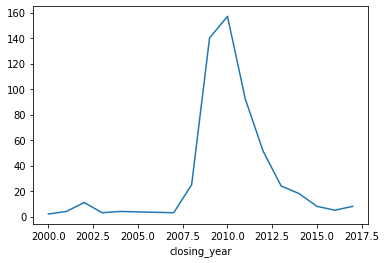

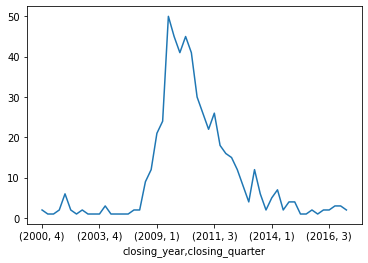

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax = closing_year.plot()
plt.show()

fig, ax=plt.subplots()
ax = closing_year_q.plot()
plt.show()

<시간 범위 수정하고 데이터 밀어내기 - shift 메서드>

[에볼라의 확산 속도 비교하기]

1. ebola 데이터프레임의 Date 열을 인덱스로 지정한 다음 x축을 Date 열, y축을 사망자 수로 지정하여 그린 그래프

In [ ]:
import matplotlib.pyplot as plt

ebola.index=ebola['Date']

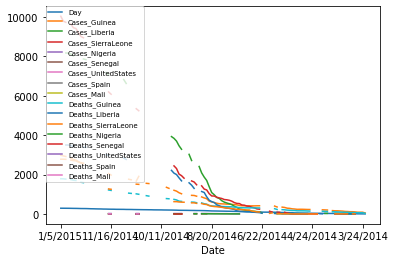

In [ ]:
fig, ax=plt.subplots()
ax=ebola.iloc[0:,1:].plot(ax=ax)
ax.legend(fontsize=7,loc=2,borderaxespad=0.)
plt.show()

2. 각 나라의 발병일을 가장 처음 에볼라가 발병한 Guinea와 동일한 위치로 옮기기

In [ ]:
ebola_sub=ebola[['Day','Cases_Guinea','Cases_Liberia']]
print(ebola_sub.tail(10))

           Day  Cases_Guinea  Cases_Liberia
Date                                       
4/4/2014    13         143.0           18.0
4/1/2014    10         127.0            8.0
3/31/2014    9         122.0            8.0
3/29/2014    7         112.0            7.0
3/28/2014    6         112.0            3.0
3/27/2014    5         103.0            8.0
3/26/2014    4          86.0            NaN
3/25/2014    3          86.0            NaN
3/24/2014    2          86.0            NaN
3/22/2014    0          49.0            NaN


3. Date 열의 자료형을 datetime 오브젝트로 변환

In [ ]:
ebola=pd.read_csv('../content/gdrive/MyDrive/country_timeseries.csv',parse_dates=['Date'])
print(ebola.head().iloc[:,:5])
print(ebola.tail().iloc[:,:5])

        Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0 2015-01-05  289        2776.0            NaN            10030.0
1 2015-01-04  288        2775.0            NaN             9780.0
2 2015-01-03  287        2769.0         8166.0             9722.0
3 2015-01-02  286           NaN         8157.0                NaN
4 2014-12-31  284        2730.0         8115.0             9633.0
          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117 2014-03-27    5         103.0            8.0                6.0
118 2014-03-26    4          86.0            NaN                NaN
119 2014-03-25    3          86.0            NaN                NaN
120 2014-03-24    2          86.0            NaN                NaN
121 2014-03-22    0          49.0            NaN                NaN


4. Date 열을 인덱스로 지정한 다음 ebola 데이터프레임의 Date 열의 최댓값과 최솟값으로 시간 범위를 생성하여 new_idx에 저장 - 날짜가 아예 없었던 데이터의 인덱스 생성

In [ ]:
ebola.index=ebola['Date']
new_idx=pd.date_range(ebola.index.min(),ebola.index.max())

5. reversed 메서드로 인덱스 순서 뒤집기

In [ ]:
print(new_idx)

DatetimeIndex(['2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31',
               ...
               '2014-12-27', '2014-12-28', '2014-12-29', '2014-12-30',
               '2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', length=290, freq='D')


In [ ]:
new_idx=reversed(new_idx)

6. reindex 메서드로 new_idx를 새로운 인덱스로 지정

In [ ]:
ebola=ebola.reindex(new_idx)

In [ ]:
print(ebola.head().iloc[:,:5])

                 Date    Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                        
2015-01-05 2015-01-05  289.0        2776.0            NaN            10030.0
2015-01-04 2015-01-04  288.0        2775.0            NaN             9780.0
2015-01-03 2015-01-03  287.0        2769.0         8166.0             9722.0
2015-01-02 2015-01-02  286.0           NaN         8157.0                NaN
2015-01-01        NaT    NaN           NaN            NaN                NaN


In [ ]:
print(ebola.tail().iloc[:,:5])

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                      
2014-03-26 2014-03-26  4.0          86.0            NaN                NaN
2014-03-25 2014-03-25  3.0          86.0            NaN                NaN
2014-03-24 2014-03-24  2.0          86.0            NaN                NaN
2014-03-23        NaT  NaN           NaN            NaN                NaN
2014-03-22 2014-03-22  0.0          49.0            NaN                NaN


7. 각 나라의 에볼라 발병일 구하기

In [ ]:
last_valid=ebola.apply(pd.Series.last_valid_index)
print(last_valid)

Date                  2014-03-22
Day                   2014-03-22
Cases_Guinea          2014-03-22
Cases_Liberia         2014-03-27
Cases_SierraLeone     2014-03-27
Cases_Nigeria         2014-07-23
Cases_Senegal         2014-08-31
Cases_UnitedStates    2014-10-01
Cases_Spain           2014-10-08
Cases_Mali            2014-10-22
Deaths_Guinea         2014-03-22
Deaths_Liberia        2014-03-27
Deaths_SierraLeone    2014-03-27
Deaths_Nigeria        2014-07-23
Deaths_Senegal        2014-09-07
Deaths_UnitedStates   2014-10-01
Deaths_Spain          2014-10-08
Deaths_Mali           2014-10-22
date_dt               2014-03-22
year                  2014-03-22
month                 2014-03-22
day                   2014-03-22
dtype: datetime64[ns]


In [ ]:
first_valid=ebola.apply(pd.Series.first_valid_index)
print(first_valid)

Date                  2015-01-05
Day                   2015-01-05
Cases_Guinea          2015-01-05
Cases_Liberia         2015-01-03
Cases_SierraLeone     2015-01-05
Cases_Nigeria         2014-12-07
Cases_Senegal         2014-12-07
Cases_UnitedStates    2014-12-07
Cases_Spain           2014-12-07
Cases_Mali            2014-12-07
Deaths_Guinea         2015-01-05
Deaths_Liberia        2015-01-03
Deaths_SierraLeone    2015-01-05
Deaths_Nigeria        2014-12-07
Deaths_Senegal        2014-12-07
Deaths_UnitedStates   2014-12-07
Deaths_Spain          2014-12-07
Deaths_Mali           2014-12-07
date_dt               2015-01-05
year                  2015-01-05
month                 2015-01-05
day                   2015-01-05
dtype: datetime64[ns]


8. 각 나라의 에볼라 발병일을 동일한 출발선으로 옮기기

In [ ]:
earliest_date=ebola.index.min()
print(earliest_date)

2014-03-22 00:00:00


In [ ]:
shift_values=last_valid - earliest_date
print(shift_values)

Date                    0 days
Day                     0 days
Cases_Guinea            0 days
Cases_Liberia           5 days
Cases_SierraLeone       5 days
Cases_Nigeria         123 days
Cases_Senegal         162 days
Cases_UnitedStates    193 days
Cases_Spain           200 days
Cases_Mali            214 days
Deaths_Guinea           0 days
Deaths_Liberia          5 days
Deaths_SierraLeone      5 days
Deaths_Nigeria        123 days
Deaths_Senegal        169 days
Deaths_UnitedStates   193 days
Deaths_Spain          200 days
Deaths_Mali           214 days
date_dt                 0 days
year                    0 days
month                   0 days
day                     0 days
dtype: timedelta64[ns]


9. 인잣값만큼 데이터를 밀어내는 shift 메서드로 각 나라의 에볼라 발병일 옮기기

In [ ]:
ebola_dict={}
for idx, col in enumerate(ebola):
  d=shift_values[idx].days
  shifted=ebola[col].shift(d)
  ebola_dict[col]=shifted

10. DataFrame 메서드로 ebola_dict의 값을 데이터프레임으로 변환

In [ ]:
ebola_shift=pd.DataFrame(ebola_dict)

11. 에볼라의 최초 발병일을 기준으로 모든 데이터가 옮겨짐

In [ ]:
print(ebola_shift.tail())

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
Date                                                                         
2014-03-26 2014-03-26  4.0          86.0            8.0                2.0   
2014-03-25 2014-03-25  3.0          86.0            NaN                NaN   
2014-03-24 2014-03-24  2.0          86.0            7.0                NaN   
2014-03-23        NaT  NaN           NaN            3.0                2.0   
2014-03-22 2014-03-22  0.0          49.0            8.0                6.0   

            Cases_Nigeria  Cases_Senegal  Cases_UnitedStates  Cases_Spain  \
Date                                                                        
2014-03-26            1.0            NaN                 1.0          1.0   
2014-03-25            NaN            NaN                 NaN          NaN   
2014-03-24            NaN            NaN                 NaN          NaN   
2014-03-23            NaN            NaN                 NaN        

12. 인덱스를 Day 열로 지정하고 필요없는 Date, Day 열 삭제

In [ ]:
ebola_shift.index=ebola_shift['Day']
ebola_shift=ebola_shift.drop(['Date','Day'],axis=1)
print(ebola_shift.tail())

     Cases_Guinea  Cases_Liberia  Cases_SierraLeone  Cases_Nigeria  \
Day                                                                  
4.0          86.0            8.0                2.0            1.0   
3.0          86.0            NaN                NaN            NaN   
2.0          86.0            7.0                NaN            NaN   
NaN           NaN            3.0                2.0            NaN   
0.0          49.0            8.0                6.0            0.0   

     Cases_Senegal  Cases_UnitedStates  Cases_Spain  Cases_Mali  \
Day                                                               
4.0            NaN                 1.0          1.0         NaN   
3.0            NaN                 NaN          NaN         NaN   
2.0            NaN                 NaN          NaN         NaN   
NaN            NaN                 NaN          NaN         NaN   
0.0            1.0                 1.0          1.0         1.0   

     Deaths_Guinea  Deaths_Liberia  Dea

13. 그래프 그리기

In [49]:
fig,ax=plt.subplots()
ax=ebola_shift.iloc[:,:].plot(ax=ax)
ax.legend(fontsize=7, loc=2, borderaxespad=0.)
plt.show()

ValueError: ignored